In [27]:
import kagglehub
import os
import pandas as pd
import pandas as pd
import numpy as np


from sklearn import model_selection
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score
from sklearn.linear_model import LinearRegression

import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE


import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Download latest version
path = kagglehub.dataset_download("toramky/automobile-dataset")

csv = os.listdir(path)[0]
df = pd.read_csv(os.path.join(path, csv))

df = df.drop(columns=['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'fuel-system', 'engine-location', 'engine-type', 'num-of-cylinders'])

df = df.apply(pd.to_numeric, errors='coerce')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
print(df.shape)
df.head()



(160, 16)


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.4,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.4,8.0,115.0,5500.0,18,22,17450.0
6,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,3.4,8.5,110.0,5500.0,19,25,17710.0
8,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,3.4,8.3,140.0,5500.0,17,20,23875.0
10,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,2.8,8.8,101.0,5800.0,23,29,16430.0


In [22]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=789)
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              243.7
Date:                Tue, 03 Dec 2024   Prob (F-statistic):                    1.44e-78
Time:                        18:55:19   Log-Likelihood:                         -1167.4
No. Observations:                 128   AIC:                                      2365.
Df Residuals:                     113   BIC:                                      2408.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
symboling          -198.3723    270.766     -0.733      0.465    -734.809     338.065
normalized-losses    15.3880      8.248      1.866      0.065      -0.952      31.728
wheel-base          381.7647    120.794      3.160      0.002     142.449     621.080
length             -122.4145     53.489     -2.289      0.024    -228.386     -16.443
width               -88.4018    196.500     -0.450      0.654    -477.704     300.901
height             -122.3293    141.519     -0.864      0.389    -402.703     158.045
curb-weight           5.4756      1.633      3.352      0.001       2.240       8.712
engine-size          15.4053     20.508      0.751      0.454     -25.225      56.035
bore              -2148.1616   1118.542     -1.921      0.057   -4364.195      67.872
stroke            -1607.2355    883.007     -1.820      0.071   -3356.631     142.160
compression-ratio   227.5343     79.519      2.861      0.005      69.992     385.077
horsepower           59.6671     18.138      3.290      0.001      23.733      95.602
peak-rpm             -0.5311      0.633     -0.839      0.403      -1.785       0.723
city-mpg           -117.7273    175.766     -0.670      0.504    -465.951     230.497
highway-mpg          14.9170    155.904      0.096      0.924    -293.958     323.792
==============================================================================
Omnibus:                        4.579   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.217
Skew:                           0.321   Prob(JB):                        0.121
Kurtosis:                       3.616   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

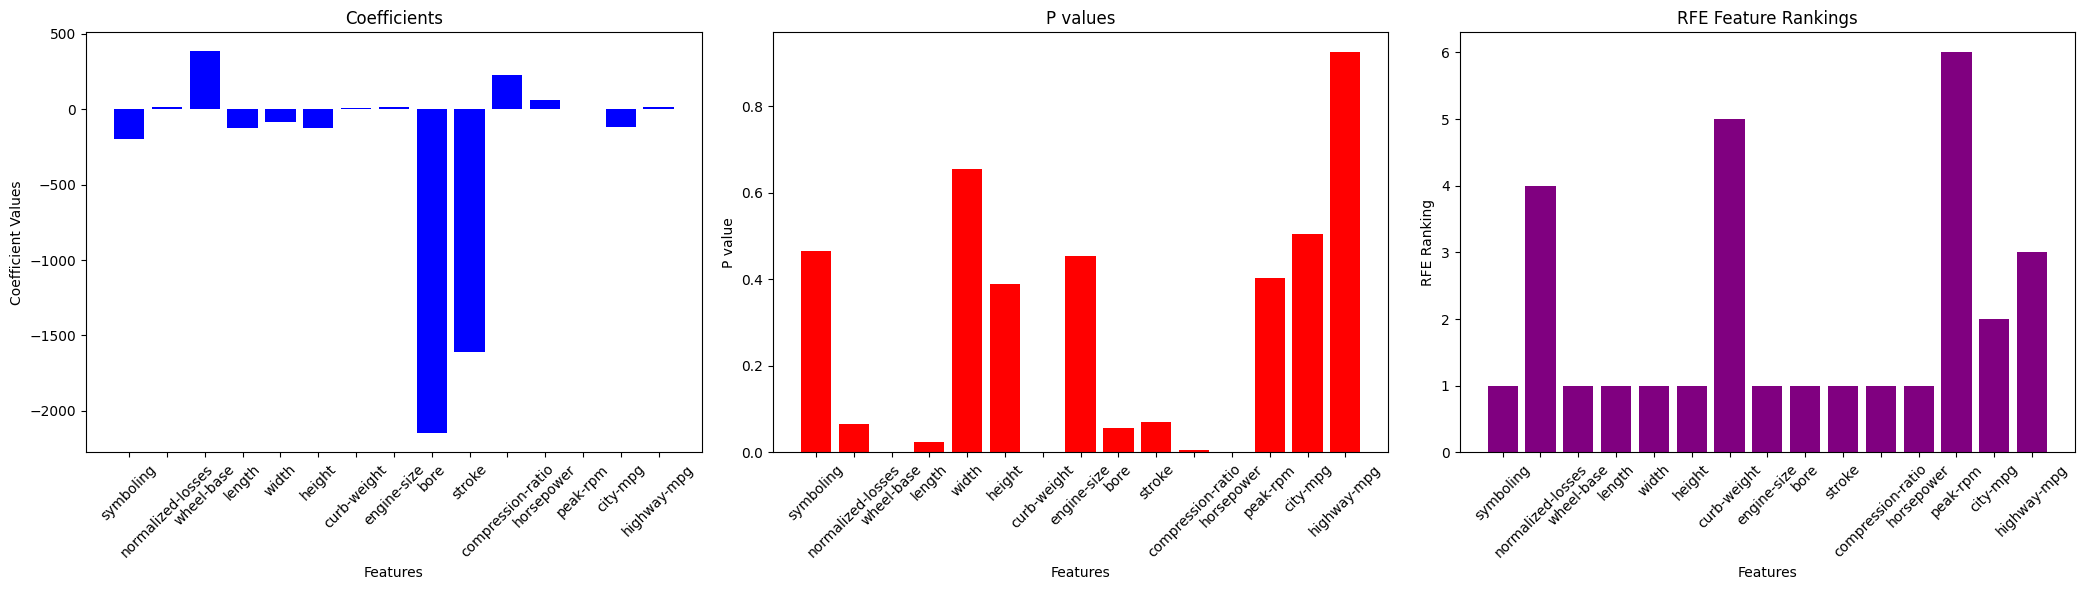

In [39]:
coefficients = model.params
p_values = model.pvalues

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients,
    'P-value': p_values
})

# Plotting the coefficients and p-values
rfe = RFE(LinearRegression(), n_features_to_select=10)  # Adjust n_features_to_select as needed
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Plotting the coefficients and P values
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 6))

# Plot coefficients
ax1.bar(results_df['Feature'], results_df['Coefficient'], color='blue')
ax1.set_xlabel('Features')
ax1.set_ylabel('Coefficient Values')
ax1.set_title('Coefficients')
ax1.tick_params(axis='x', rotation=45)

# Plot p values
ax2.bar(results_df['Feature'], results_df['P-value'], color='red')
ax2.set_xlabel('Features')
ax2.set_ylabel('P value')
ax2.set_title('P values')
ax2.tick_params(axis='x', rotation=45)

# Plot RFE rankings
rfe_support = rfe.support_
rfe_ranking = rfe.ranking_

rfe_results_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Support': rfe_support,
    'Ranking': rfe_ranking
})

ax3.bar(rfe_results_df['Feature'], rfe_results_df['Ranking'], color='purple')
ax3.set_xlabel('Features')
ax3.set_ylabel('RFE Ranking')
ax3.set_title('RFE Feature Rankings')
ax3.tick_params(axis='x', rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Normalized-Losses vs Price











Since NL has a high correlation and high importance, lets plot some graphs to investigate

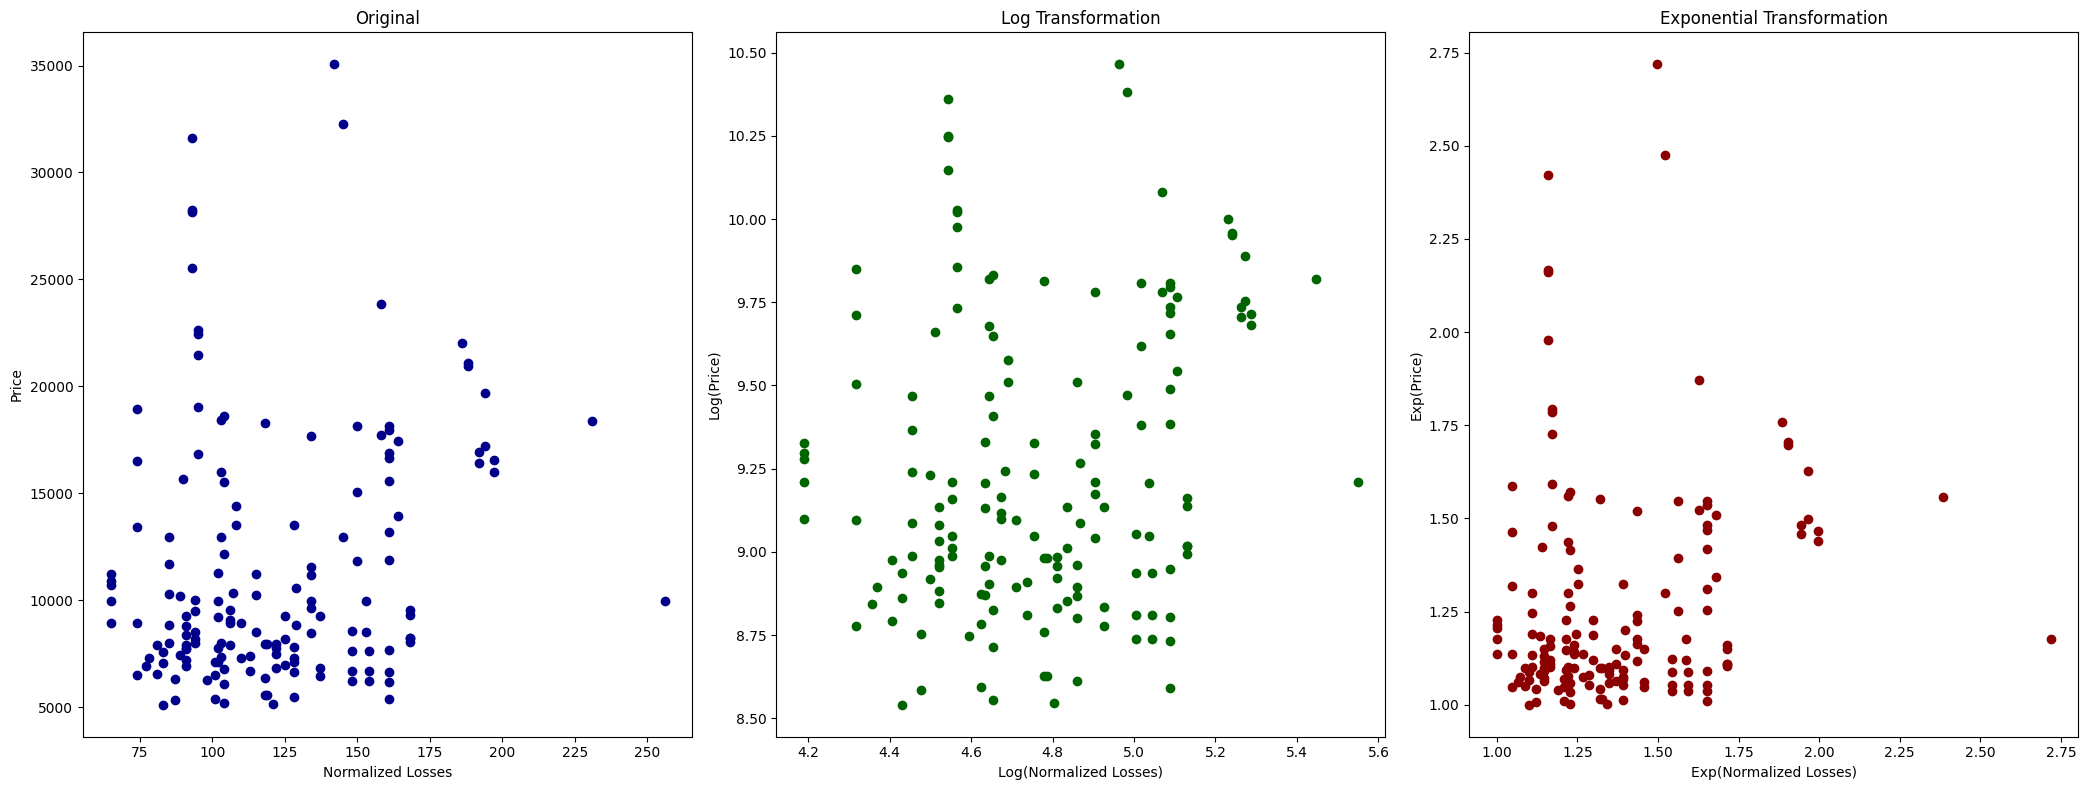

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
normalized_losses_scaled = scaler.fit_transform(df[['normalized-losses']])
price_scaled = scaler.fit_transform(df[['price']])

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 8))

# Original scatter plot
ax1.scatter(df['normalized-losses'], df['price'], color='darkblue')
ax1.set_title('Original')
ax1.set_xlabel('Normalized Losses')
ax1.set_ylabel('Price')

# Log transformation
ax2.scatter(np.log1p(df['normalized-losses']), np.log1p(df['price']), color='darkgreen')
ax2.set_title('Log Transformation')
ax2.set_xlabel('Log(Normalized Losses)')
ax2.set_ylabel('Log(Price)')

# Exponential transformation with scaled data
ax3.scatter(np.exp(normalized_losses_scaled), np.exp(price_scaled), color='darkred')
ax3.set_title('Exponential Transformation')
ax3.set_xlabel('Exp(Normalized Losses)')
ax3.set_ylabel('Exp(Price)')

plt.tight_layout()
plt.show()

/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_27896/1409216771.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['normalized-losses'], y=df['price'], ax=ax1, cmap="Blues", shade=True)
/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_27896/1409216771.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.log1p(df['normalized-losses']), y=np.log1p(df['price']), ax=ax2, cmap="Greens", shade=True)
/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_27896/1409216771.py:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.exp(normalized_losses_scaled.flatten()), y=np.exp(price_scaled.

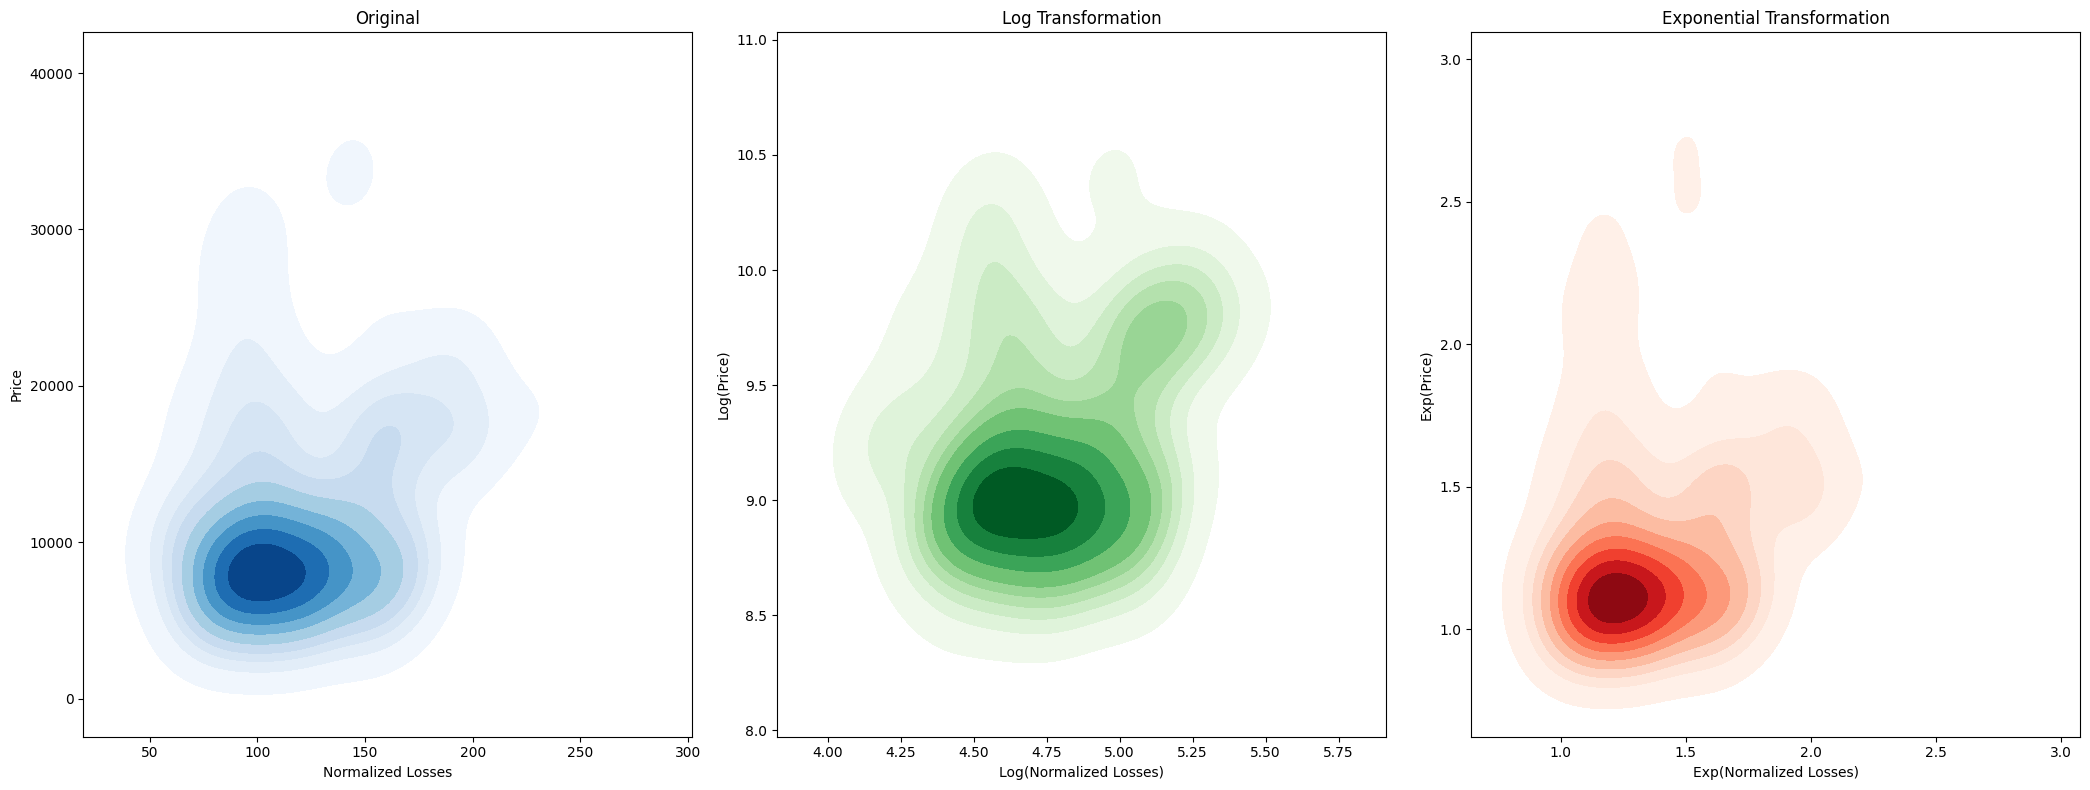

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler()
normalized_losses_scaled = scaler.fit_transform(df[['normalized-losses']])
price_scaled = scaler.fit_transform(df[['price']])

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 8))

# Original density plot
sns.kdeplot(x=df['normalized-losses'], y=df['price'], ax=ax1, cmap="Blues", shade=True)
ax1.set_title('Original')
ax1.set_xlabel('Normalized Losses')
ax1.set_ylabel('Price')

# Log transformation density plot
sns.kdeplot(x=np.log1p(df['normalized-losses']), y=np.log1p(df['price']), ax=ax2, cmap="Greens", shade=True)
ax2.set_title('Log Transformation')
ax2.set_xlabel('Log(Normalized Losses)')
ax2.set_ylabel('Log(Price)')

# Exponential transformation density plot with scaled data
sns.kdeplot(x=np.exp(normalized_losses_scaled.flatten()), y=np.exp(price_scaled.flatten()), ax=ax3, cmap="Reds", shade=True)
ax3.set_title('Exponential Transformation')
ax3.set_xlabel('Exp(Normalized Losses)')
ax3.set_ylabel('Exp(Price)')

plt.tight_layout()
plt.show()

/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_27896/1499675141.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=normalized_losses_scaled.flatten(), y=price_scaled.flatten(), ax=ax1, cmap="Blues", shade=True)
/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_27896/1499675141.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.log1p(normalized_losses_scaled.flatten()), y=np.log1p(price_scaled.flatten()), ax=ax2, cmap="Greens", shade=True)
/var/folders/xh/2_ykktld4lz_4rb5ny5cphk40000gn/T/ipykernel_27896/1499675141.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=np.exp(normalized_losse

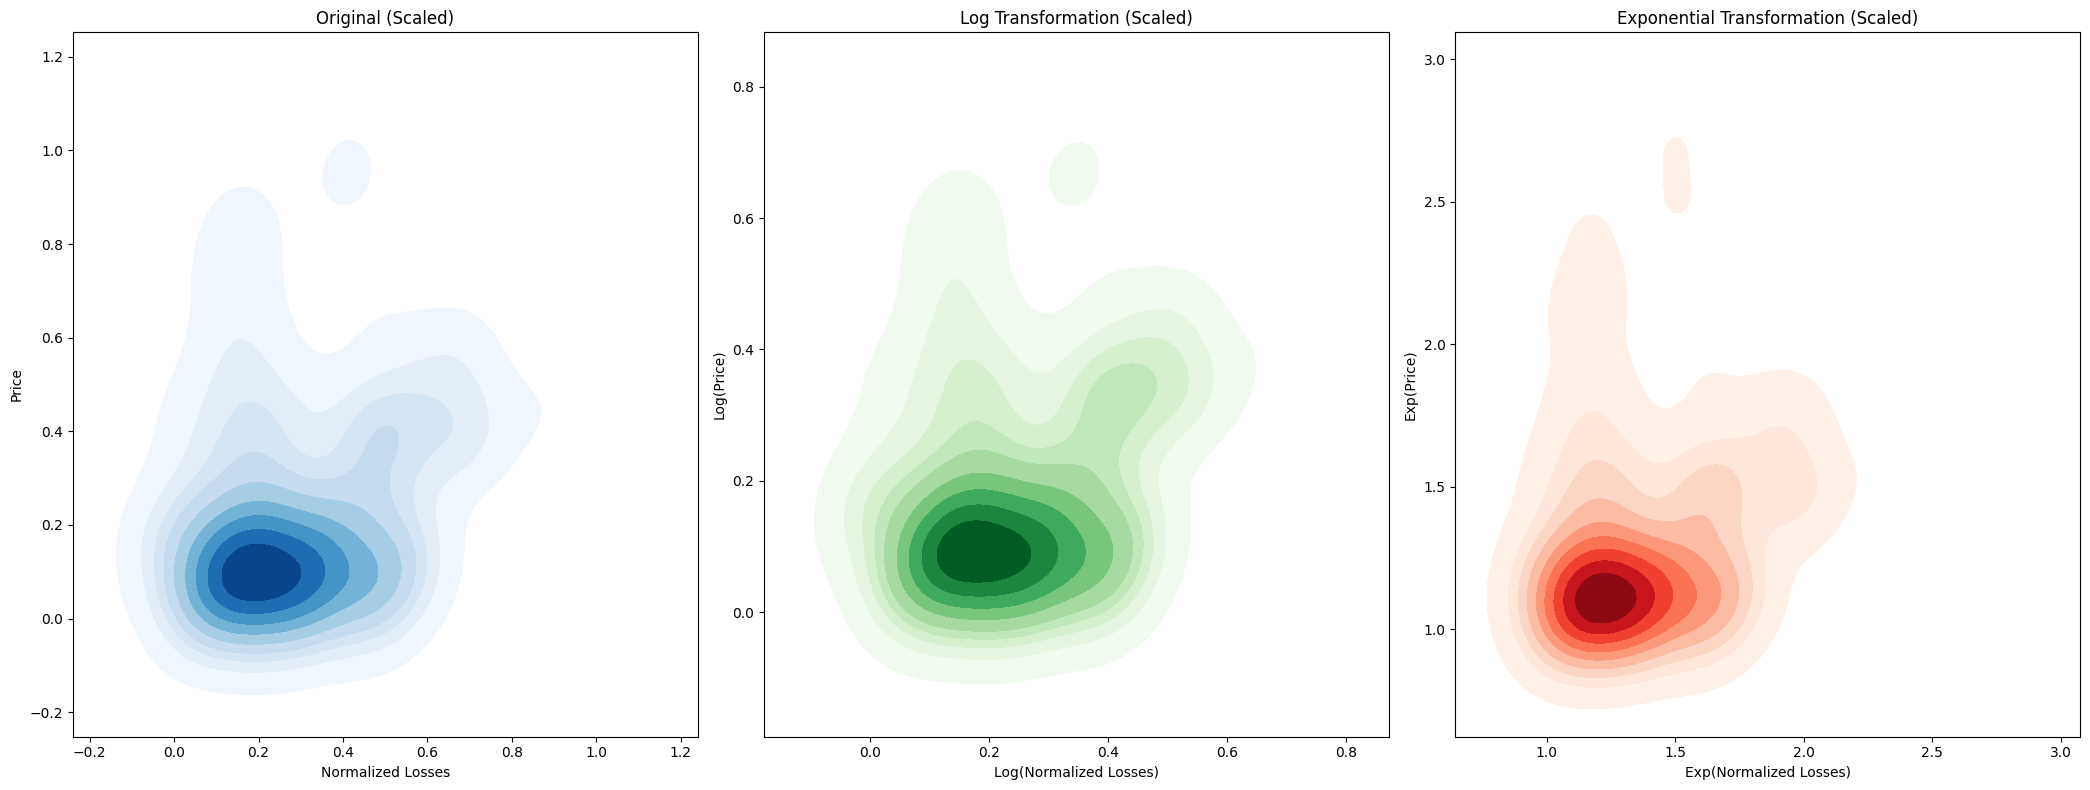

In [44]:
scaler = MinMaxScaler()
normalized_losses_scaled = scaler.fit_transform(df[['normalized-losses']])
price_scaled = scaler.fit_transform(df[['price']])

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 8))

# Original density plot with scaled data
sns.kdeplot(x=normalized_losses_scaled.flatten(), y=price_scaled.flatten(), ax=ax1, cmap="Blues", shade=True)
ax1.set_title('Original (Scaled)')
ax1.set_xlabel('Normalized Losses')
ax1.set_ylabel('Price')

# Log transformation density plot with scaled data
sns.kdeplot(x=np.log1p(normalized_losses_scaled.flatten()), y=np.log1p(price_scaled.flatten()), ax=ax2, cmap="Greens", shade=True)
ax2.set_title('Log Transformation (Scaled)')
ax2.set_xlabel('Log(Normalized Losses)')
ax2.set_ylabel('Log(Price)')

# Exponential transformation density plot with scaled data
sns.kdeplot(x=np.exp(normalized_losses_scaled.flatten()), y=np.exp(price_scaled.flatten()), ax=ax3, cmap="Reds", shade=True)
ax3.set_title('Exponential Transformation (Scaled)')
ax3.set_xlabel('Exp(Normalized Losses)')
ax3.set_ylabel('Exp(Price)')

plt.tight_layout()
plt.show()

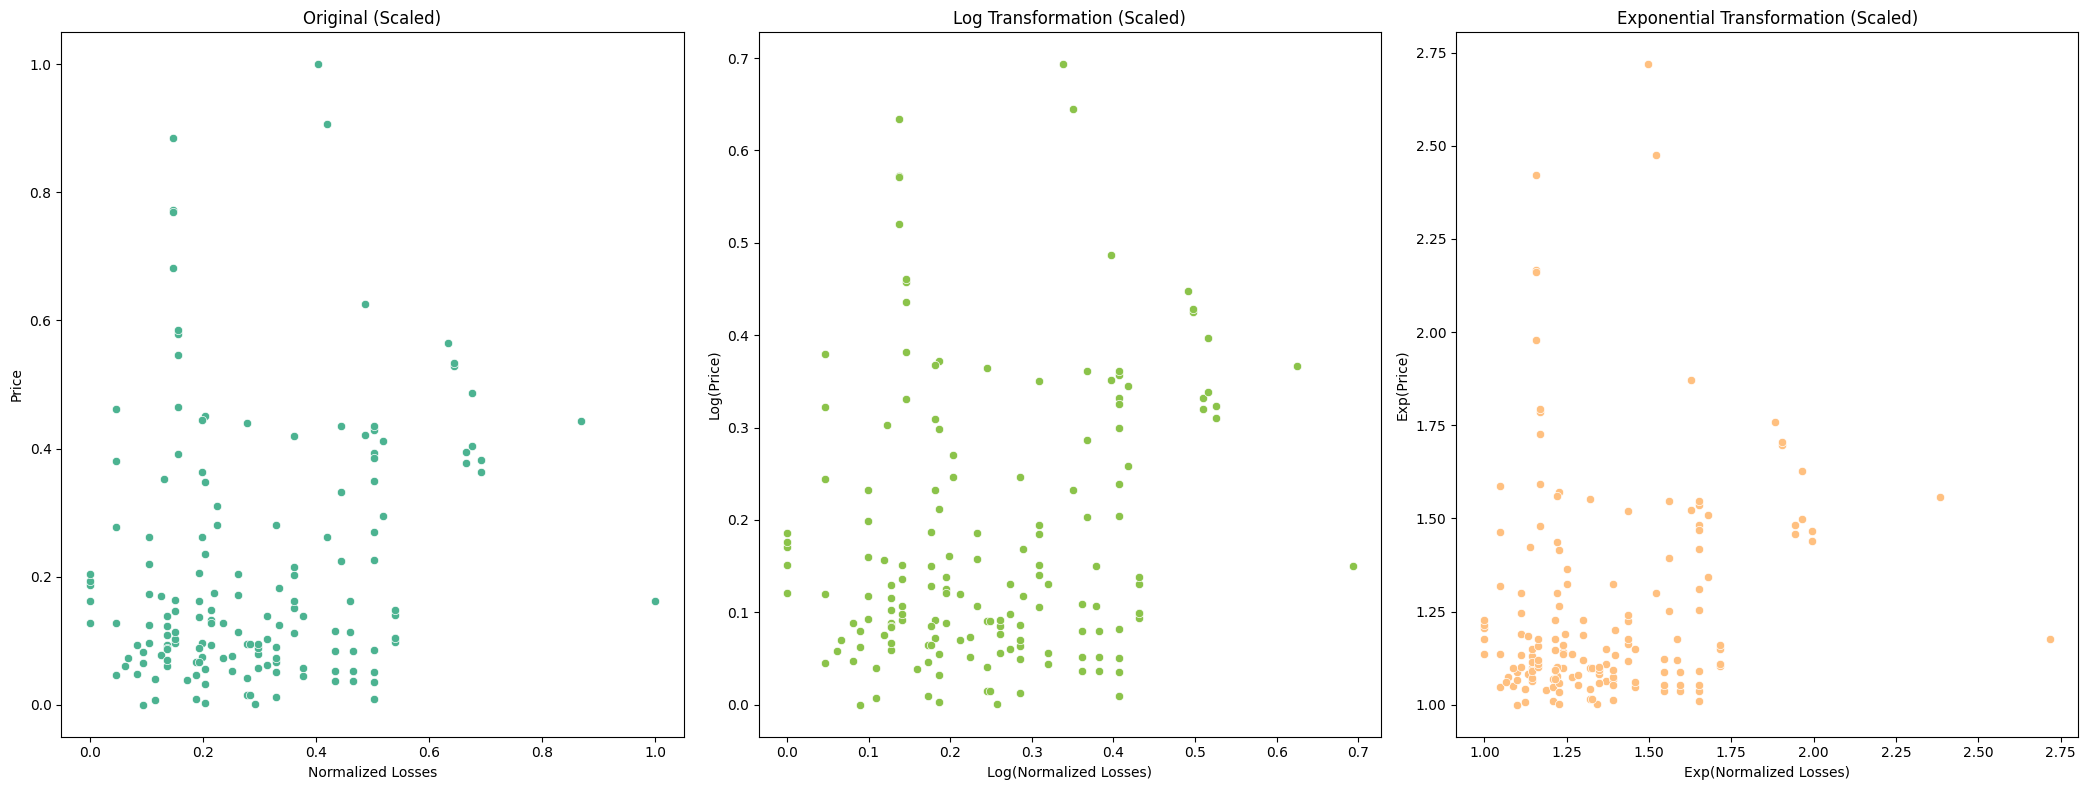

In [45]:
scaler = MinMaxScaler()
normalized_losses_scaled = scaler.fit_transform(df[['normalized-losses']])
price_scaled = scaler.fit_transform(df[['price']])

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 8))

# Original scatter plot with scaled data
sns.scatterplot(x=normalized_losses_scaled.flatten(), y=price_scaled.flatten(), ax=ax1, color="#4CB391")
ax1.set_title('Original (Scaled)')
ax1.set_xlabel('Normalized Losses')
ax1.set_ylabel('Price')

# Log transformation scatter plot with scaled data
sns.scatterplot(x=np.log1p(normalized_losses_scaled.flatten()), y=np.log1p(price_scaled.flatten()), ax=ax2, color="#8BC34A")
ax2.set_title('Log Transformation (Scaled)')
ax2.set_xlabel('Log(Normalized Losses)')
ax2.set_ylabel('Log(Price)')

# Exponential transformation scatter plot with scaled data
sns.scatterplot(x=np.exp(normalized_losses_scaled.flatten()), y=np.exp(price_scaled.flatten()), ax=ax3, color="#FFC080")
ax3.set_title('Exponential Transformation (Scaled)')
ax3.set_xlabel('Exp(Normalized Losses)')
ax3.set_ylabel('Exp(Price)')

plt.tight_layout()
plt.show()

In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set a threshold for high correlation
threshold = 0.8

# Find pairs of features with correlation above the threshold
high_correlation_pairs = [(i, j) for i in correlation_matrix.columns for j in correlation_matrix.columns 
                          if i != j and abs(correlation_matrix.loc[i, j]) > threshold]

# Print the pairs of highly correlated features
high_correlation_pairs

[('wheel-base', 'length'),
 ('wheel-base', 'width'),
 ('wheel-base', 'curb-weight'),
 ('length', 'wheel-base'),
 ('length', 'width'),
 ('length', 'curb-weight'),
 ('width', 'wheel-base'),
 ('width', 'length'),
 ('width', 'curb-weight'),
 ('width', 'price'),
 ('curb-weight', 'wheel-base'),
 ('curb-weight', 'length'),
 ('curb-weight', 'width'),
 ('curb-weight', 'engine-size'),
 ('curb-weight', 'price'),
 ('engine-size', 'curb-weight'),
 ('engine-size', 'horsepower'),
 ('engine-size', 'price'),
 ('horsepower', 'engine-size'),
 ('horsepower', 'city-mpg'),
 ('horsepower', 'highway-mpg'),
 ('city-mpg', 'horsepower'),
 ('city-mpg', 'highway-mpg'),
 ('highway-mpg', 'horsepower'),
 ('highway-mpg', 'city-mpg'),
 ('price', 'width'),
 ('price', 'curb-weight'),
 ('price', 'engine-size')]

In [9]:
df.corr()["price"].sort_values(ascending=True)

highway-mpg         -0.718314
city-mpg            -0.690100
peak-rpm            -0.173970
symboling           -0.163329
stroke               0.158798
normalized-losses    0.199924
compression-ratio    0.210948
height               0.247500
bore                 0.534891
wheel-base           0.734789
horsepower           0.758582
length               0.760323
engine-size          0.841725
width                0.843316
curb-weight          0.893810
price                1.000000
Name: price, dtype: float64

In [ ]:
df.drop(columns=['Loan ID']).corrwith(df['Loan Status'])
